<a href="https://colab.research.google.com/github/KavyaChoudhary2008/class115/blob/main/project115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("escape_velocity.csv")
velocity_list=df["Velocity"].tolist()
escaped_list=df["Escaped"].tolist()
fig=px.scatter(x=velocity_list,y=escaped_list)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



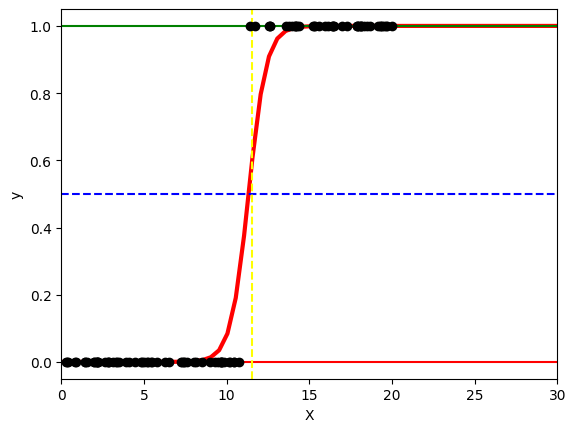

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
# reshape the array without changing the data.
X = np.reshape(velocity_list, (len(velocity_list), 1))
Y = np.reshape(escaped_list, (len(escaped_list), 1))

lr = LogisticRegression()
lr.fit(X, Y)

plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula 
# linespace (start,stop,num: int)
X_test = np.linspace(0, 100, 200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0, color='red', linestyle='-')
plt.axhline(y=1, color='green', linestyle='-')
plt.axhline(y=0.5, color='blue', linestyle='--')

# do hit and trial by changing the value of X_test
plt.axvline(x=X_test[23], color='yellow', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(0, 30)
plt.show()

In [13]:
user_score = float(input("Enter your velocity here:- "))
chances = model(user_score * lr.coef_ + lr.intercept_).ravel()[0]
print(chances)

if chances <= 0.01:
  print("The person will not escape")
elif chances >= 1:
  print("The person will escape")
elif chances < 0.5:
  print("The person might not escape")
else:
  print("The person may escape")

Enter your velocity here:- 15.98
0.999829953870145
The person may escape
